In [2]:
import sys
sys.path.append("..")
from importlib import reload
import helper_visa as vs
import time
import joblib
from pylab import *
reload(vs)


<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/CUTE_noise_debug/../helper_visa.py'>

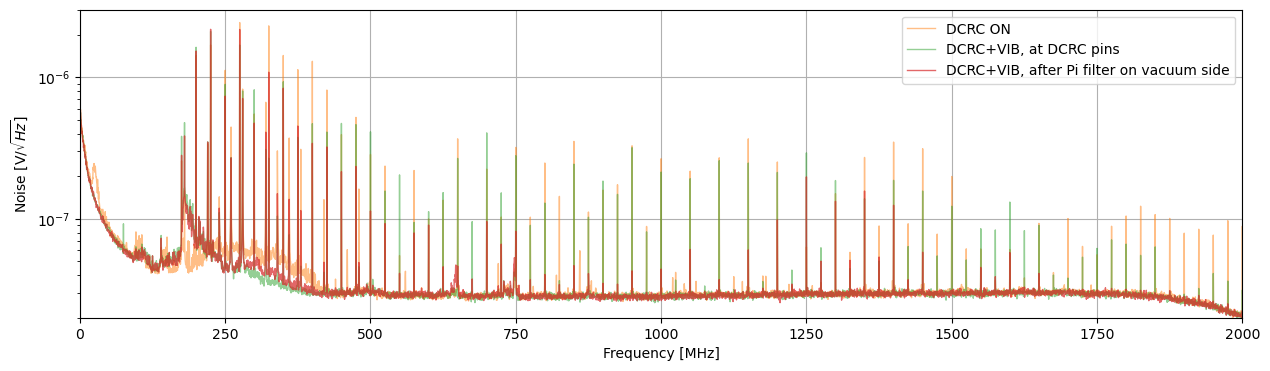

In [30]:
file_list = [
"PSD_0_DCRC_OFF.joblib",
"PSD_1_DCRC_ON.joblib",
"PSD_2_DCRC_VIB_PINs.joblib",
"PSD_3_DCRC_VIB_BOTTOM.joblib",
]

labels = ["DCRC Off", "DCRC ON", "DCRC+VIB, at DCRC pins", "DCRC+VIB, after Pi filter on vacuum side"]
# alphas = [1,0.5]
alphas = [1,0.5, 0.5,0.7]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [1,2,3]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    plot(psd_save["f[Hz]"]/1e6,psd_save["psd[V/rtHz]"],linewidth=1,alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")



xlim(0,2000)
ylim(2e-8,3e-6)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V/$\sqrt{Hz}$]")
grid()
legend()

DCRC off 0.0 mV_rms
DCRC on, TES_Bias_6 (A1) to TES_Bias_GND (D25) 0.6373327805596317 mV_rms
DCRC on, TES_Bias_6 (A1) to SQF_Rtn_6 (A2) 0.33450400822187687 mV_rms


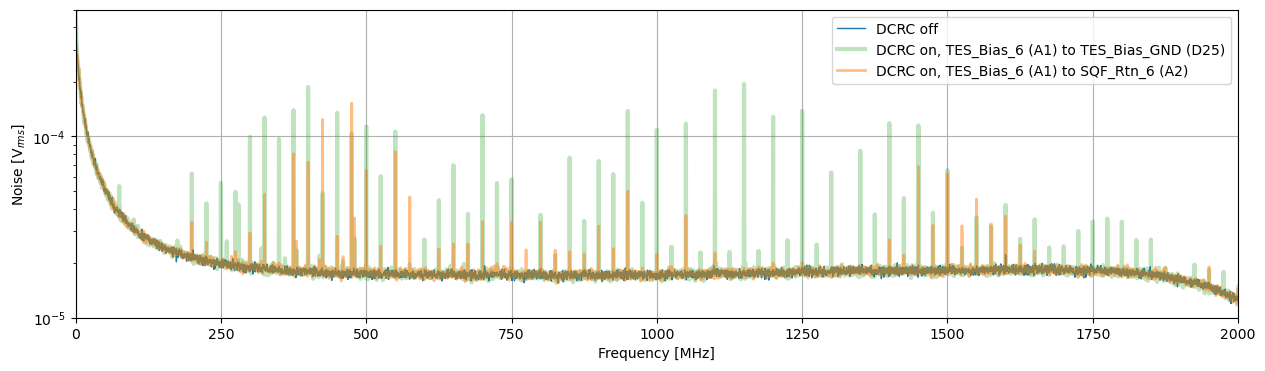

In [88]:
# file_list = [
# "PSD_5_DCRC_VIB_PINs_100Ohm.joblib",
# "PSD_3_DCRC_VIB_BOTTOM_100Ohm.joblib",
# ]

file_list = [
"PSD_6.joblib",
"PSD_15.joblib",
"PSD_16.joblib",
]

labels = ["DCRC off", "DCRC on, TES_Bias_6 (A1) to SQF_Rtn_6 (A2)", "DCRC on, TES_Bias_6 (A1) to TES_Bias_GND (D25)"]
# alphas = [1,0.5]
alphas = [1,0.5, 0.3,0.7]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,2,1]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6

    plot(freq,  noise_voltage,linewidth=ifile+1,alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")

    threshold = 4e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>125)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")

xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()

TES_BIAS_6 (A1) to VIB_GND 0.0 mV_rms
DCRC_GND (D25) to VIB_GND 0.16177639116478548 mV_rms
TES_BIAS_6 (A1) to DCRC_GND (D25) 0.06648113375508385 mV_rms


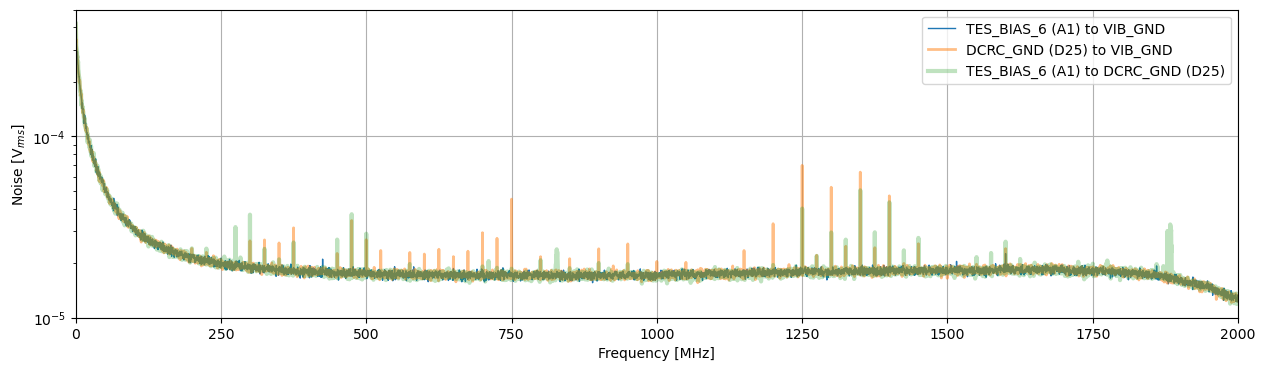

In [115]:
# file_list = [
# "PSD_5_DCRC_VIB_PINs_100Ohm.joblib",
# "PSD_3_DCRC_VIB_BOTTOM_100Ohm.joblib",
# ]

file_list = [
# "PSD_6.joblib",
# "PSD_15.joblib",
"PSD_10.joblib",
"PSD_13.joblib",
"PSD_1020.joblib",
]

labels = [ "TES_BIAS_6 (A1) to VIB_GND"
          , "DCRC_GND (D25) to VIB_GND"
          , "TES_BIAS_6 (A1) to DCRC_GND (D25)"]
# alphas = [1,0.5]
alphas = [1,0.5, 0.3,0.3]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,1, 2]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6

    plot(freq,  noise_voltage,linewidth=ifile+1,alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")

    threshold = 4e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>125)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")

xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()

TES_Bias_2 to TES_GND, on side 2 0.15545237895120012 mV_rms


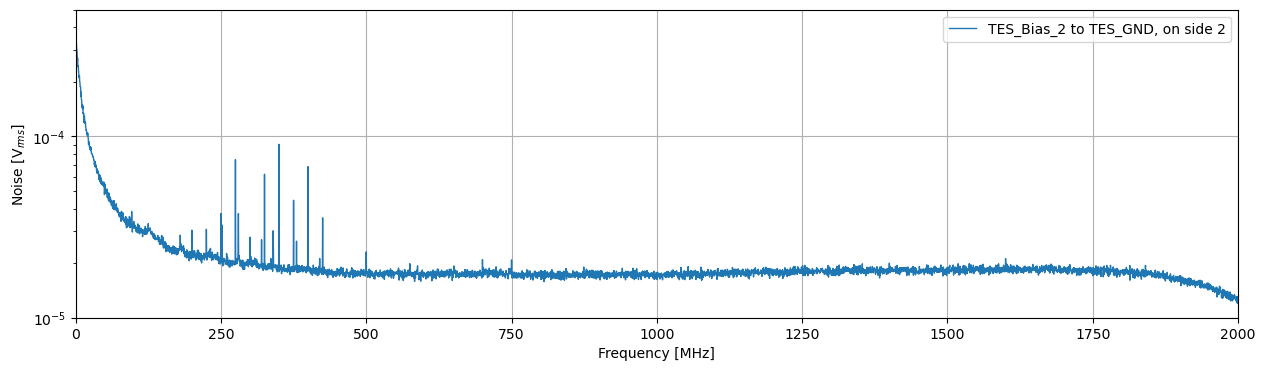

In [119]:
file_list = [
"PSD_1021.joblib",
]

labels = ["TES_Bias_2 to TES_GND, on side 2"]
# alphas = [1,0.5]
alphas = [1,0.5, 0.3,0.7]
linewidths = [1,2,3]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6

    plot(freq,  noise_voltage,linewidth=ifile+1,alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")

    threshold = 4e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>125)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")



xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()
# title("at 100 pin vacuum")
# axvline(275)

TES_Bias_6 (A1) to TES_Bias_GND (D25) 0.21481280470025896 mV_rms
TES_Bias_6 (A1) to VIB_GND 0.18240733422152242 mV_rms
TES_Bias_GND (D25) to VIB_GND 0.10716667530121626 mV_rms


Text(0.5, 1.0, 'at the surface mount 100 pin connector')

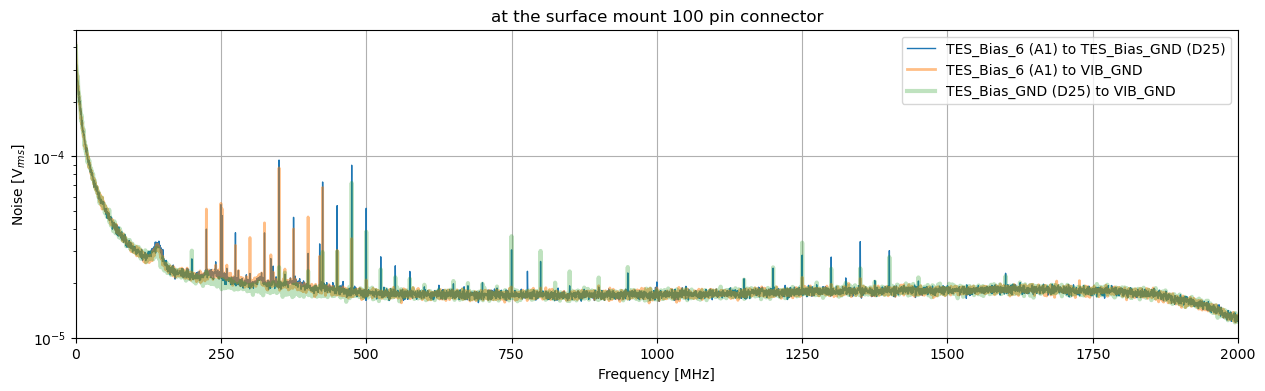

In [140]:
# file_list = [
# "PSD_107.joblib",
# "PSD_1017.joblib",
# "PSD_1018.joblib",
# ]

file_list = [
"PSD_1022.joblib",
"PSD_1027.joblib",
"PSD_1028.joblib",
]

labels = ["TES_Bias_6 (A1) to TES_Bias_GND (D25)", "TES_Bias_6 (A1) to VIB_GND", "TES_Bias_GND (D25) to VIB_GND"]
# alphas = [1,0.5]
alphas = [1,0.5, 0.3,0.7]
linewidths = [1,2,3]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,1,2]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6

    plot(freq,  noise_voltage,linewidth=ifile+1,alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")

    threshold = 2.5e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>180)&(freq<1000)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")



xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()
title("at the surface mount 100 pin connector")
# axvline(275)

DCRC on 0.21304864950322852 mV_rms
DCRC write_reg(0x20, 0x10) # Make this DCRC the bus master 0.214282197778464 mV_rms
DCRC write_reg(0x0, 0x10) # Turn on digitization 0.25079817523228576 mV_rms
DCRC write_reg(0x610, 1)  # Enable Charge Amp Power 0.2466936103154231 mV_rms
DCRC write_reg(0x611, 1)  # Enable 15V Power 0.25598374915004135 mV_rms
DCRC taking phonon data 0.2540881706601451 mV_rms


Text(0.5, 1.0, 'After the pi filter, at the surface mount 100 pin connector, TES_Bias_6 (A1) to TES_Bias_GND (D25)')

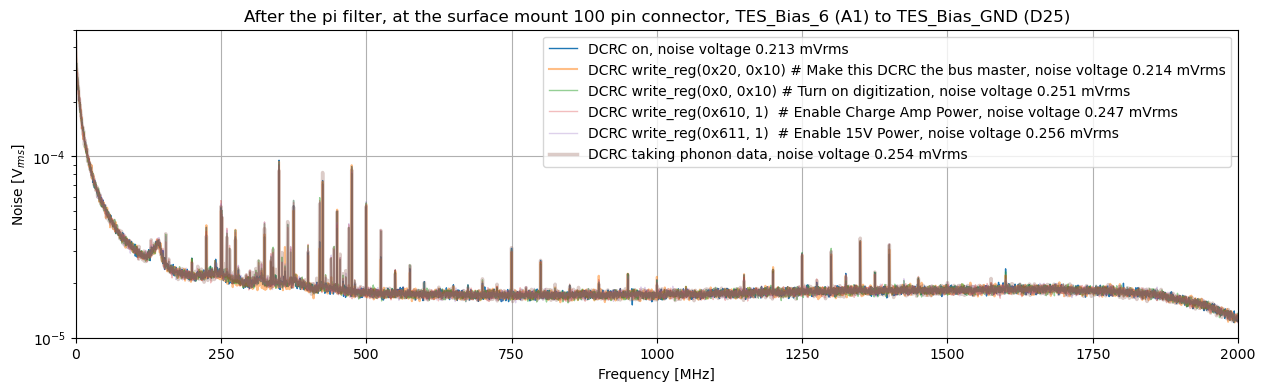

In [159]:
file_list = [
"PSD_1022.joblib",
"PSD_1023.joblib",
"PSD_1024.joblib",
"PSD_1025.joblib",
"PSD_1026.joblib",
"PSD_1026b.joblib",
]

labels = ["DCRC on", 
          "DCRC write_reg(0x20, 0x10) # Make this DCRC the bus master",
          "DCRC write_reg(0x0, 0x10) # Turn on digitization",
          "DCRC write_reg(0x610, 1)  # Enable Charge Amp Power",
          "DCRC write_reg(0x611, 1)  # Enable 15V Power",
          "DCRC taking phonon data",

]
# alphas = [1,0.5]
alphas = [1,0.5, 0.5, 0.3,0.3, 0.3]
linewidths = [1,1.5,1,1,1,2.5]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,1,2,3,4,5]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6
    threshold = 2.5e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>200)&(freq<1000)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")    

    plot(freq,  noise_voltage,linewidth=linewidths[ifile],alpha=alphas[ifile],label=labels[ifile]+f", noise voltage {noise_sum*1e3:.3f} mVrms", color=f"C{ifile}")





xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()
# axhline(2.5e-5)
title("After the pi filter, at the surface mount 100 pin connector, TES_Bias_6 (A1) to TES_Bias_GND (D25)")
# axvline(275)

DCRC off 0.0 mV_rms
DCRC on 0.492653001636445 mV_rms
DCRC on, after the pi filter 0.21304864950322852 mV_rms
DCRC on, after the pi filter, Turn on digitization 0.25079817523228576 mV_rms


Text(0.5, 1.0, 'TES_Bias_6 (A1) to TES_Bias_GND (D25)')

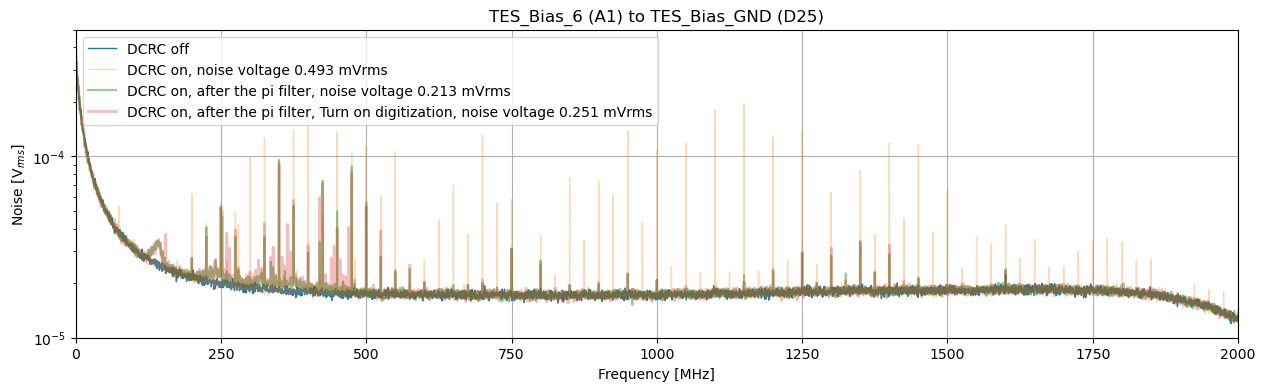

In [165]:
file_list = [
"PSD_6.joblib",
"PSD_16.joblib",
"PSD_1022.joblib",
"PSD_1024.joblib",
]

labels = ["DCRC off", "DCRC on",
          "DCRC on, after the pi filter",
          "DCRC on, after the pi filter, Turn on digitization",

]
# alphas = [1,0.5]
alphas = [1,0.3, 0.5, 0.3,0.3, 0.3]
linewidths = [1,1,1.5,2,1,2.5]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,1,2,3]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6
    threshold = 2.5e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>200)&(freq<1000)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")    

    if ifile!=0:
        plot(freq,  noise_voltage,linewidth=linewidths[ifile],alpha=alphas[ifile],label=labels[ifile]+f", noise voltage {noise_sum*1e3:.3f} mVrms", color=f"C{ifile}")
    else:
        plot(freq,  noise_voltage,linewidth=linewidths[ifile],alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")





xlim(0,2000)
ylim(1e-5,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()
# axhline(2.5e-5)
title("TES_Bias_6 (A1) to TES_Bias_GND (D25)")
# axvline(275)

Settings used in this presentation 0.25598374915004135 mV_rms
Better performace with longer trace length 0.177188414969902 mV_rms


Text(0.5, 1.0, 'TES_Bias_6 (A1) to TES_Bias_GND (D25)')

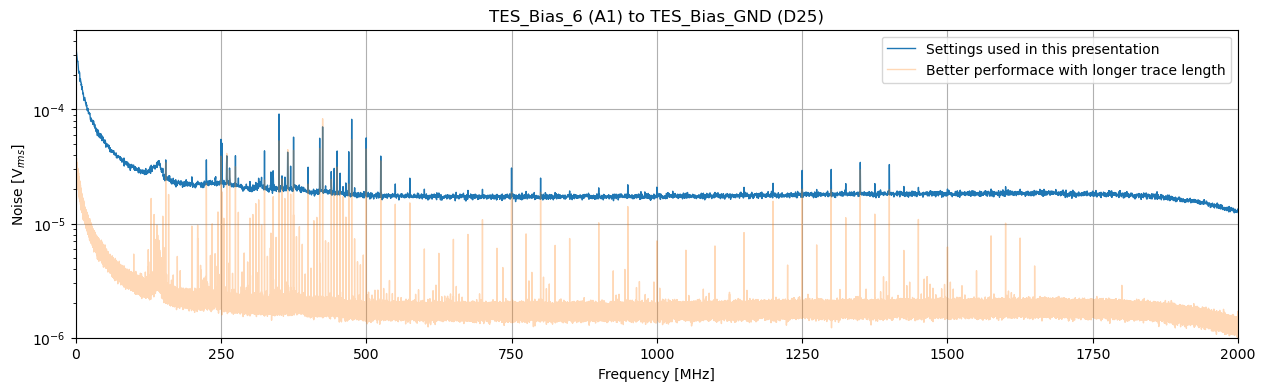

In [172]:
file_list = [
"PSD_1026.joblib",
"PSD_1026c.joblib",
]

labels = ["Settings used in this presentation", "Better performace with longer trace length",

]
# alphas = [1,0.5]
alphas = [1,0.3, 0.5, 0.3,0.3, 0.3]
linewidths = [1,1,1.5,2,1,2.5]

figure(figsize=(15,4))

# for ifile in range(len(file_list)):
for ifile in [0,1]:
    psd_save = joblib.load(f"../Keysight/data_dcrc/{file_list[ifile]}")
    bin_width = psd_save["f[Hz]"][1]-psd_save["f[Hz]"][0]
    noise_voltage = psd_save["psd[V/rtHz]"]*np.sqrt(bin_width)
    freq  = psd_save["f[Hz]"]/1e6
    threshold = 2.5e-5
    noise_sum = np.linalg.norm(noise_voltage[(freq>200)&(freq<1000)&(noise_voltage>threshold)])
    print(labels[ifile], noise_sum*1e3, "mV_rms")    

    # if ifile!=0:
    #     plot(freq,  noise_voltage,linewidth=linewidths[ifile],alpha=alphas[ifile],label=labels[ifile]+f", noise voltage {noise_sum*1e3:.3f} mVrms", color=f"C{ifile}")
    # else:
    plot(freq,  noise_voltage,linewidth=linewidths[ifile],alpha=alphas[ifile],label=labels[ifile], color=f"C{ifile}")





xlim(0,2000)
ylim(1e-6,0.5e-3)
yscale("log")
xlabel("Frequency [MHz]")
ylabel("Noise [V$_{rms}]$")
grid()
legend()
# axhline(2.5e-5)
title("TES_Bias_6 (A1) to TES_Bias_GND (D25)")
# axvline(275)

In [70]:
(0.25e-3/180/2)**2*0.03 

1.4467592592592595e-14

/tmp/ipykernel_215553/311063044.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  xlim(0,500)


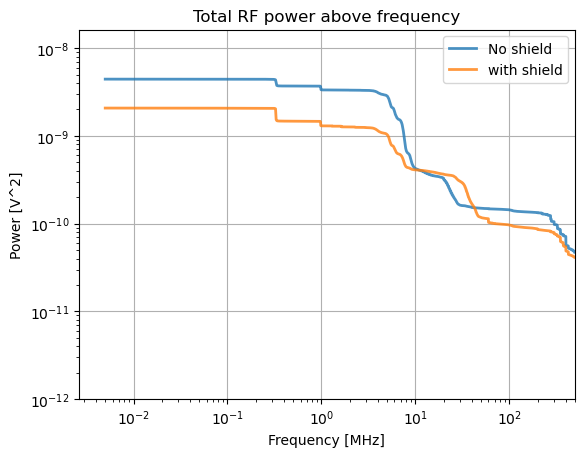

/tmp/ipykernel_215553/311063044.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  xlim(0,500)


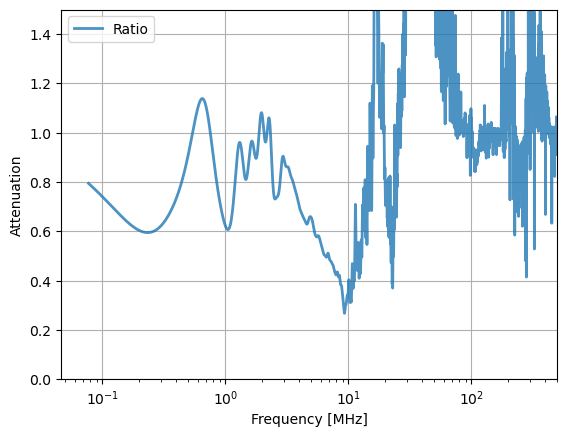

In [186]:
plot(psd_save["freq"][1:]/1e6,power_cumsum_1,linewidth=2,alpha=0.8,label="No shield")
plot(psd_save["freq"][1:]/1e6,power_cumsum_2,linewidth=2,alpha=0.8,label="with shield")
yscale("log")
xscale("log")
xlim(0,500)
ylim(1e-12,)
xlabel("Frequency [MHz]")
ylabel("Power [V^2]")
title("Total RF power above frequency")
legend()
grid()

show()


freq = scipy.ndimage.gaussian_filter(psd_save["freq"][:]/1e6, 20)
att = scipy.ndimage.gaussian_filter(power_2/power_1, 20)
plot(freq,att,linewidth=2,alpha=0.8,label="Ratio")
# yscale("log")
xscale("log")
xlim(0,500)
ylim(0,1.5)
xlabel("Frequency [MHz]")
ylabel("Attenuation")
legend()
grid()

In [40]:
event_time = np.random.exponential(10, (10000,40))
event_time_sorted = np.sort(event_time, axis = 1)
event_trigger_time = event_time_sorted[:,1]

In [62]:
# import ROOT
# npars = 4
# f_pulse = ROOT.TF1("pulse", Pulse, 1,0, 8,5,npars)

N = 1000000
x = np.random.uniform(0,50,N)
y = np.random.uniform(0,1,N)
tau_plastic = 5
tau_fiber   = 8

mask = y<hp.Pulse(x, 1, 0, tau_fiber, tau_plastic)

x_selected = x[mask]

In [66]:
npe=10
trigger_threshold=1.5
xx = np.reshape(x_selected[:int(len(x_selected)//npe*npe)], (len(x_selected)//npe, npe))
event_time_sorted = np.sort(xx, axis = 1)
event_trigger_time = event_time_sorted[:,int(trigger_threshold)]

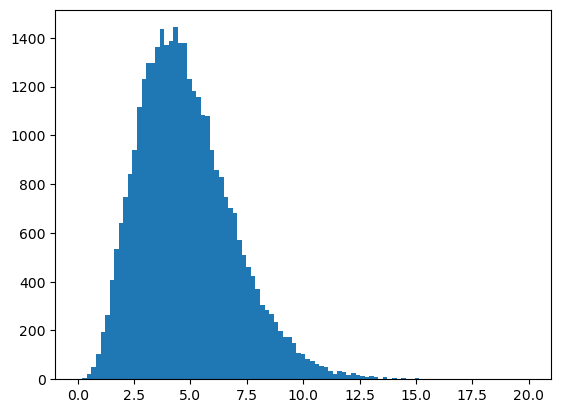

In [67]:
hist(event_trigger_time, bins=np.linspace(0,20,100));

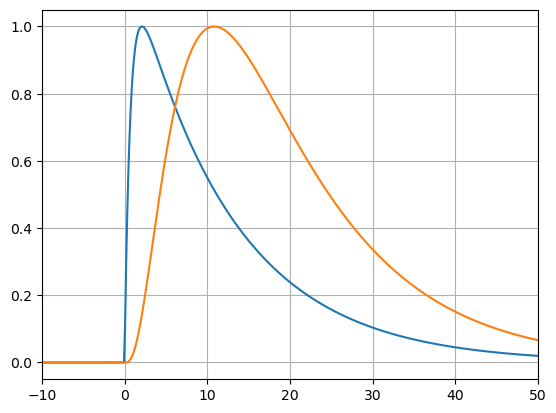

In [17]:
import helper_basic as hp

t = np.linspace(-2000,2000,30000)
y = hp.Pulse(t, 1, 0, 0.7, 12)

# exp_decay = np.exp(-t/5)*np.heaviside(t,0)
tau_plastic = 5
tau_fiber   = 2
exp_decay = hp.Pulse(t, 1, 0, tau_fiber, tau_plastic)

y_smeared = np.convolve(exp_decay, y, mode="same")
y_smeared/=max(y_smeared)
plot(t, y)
plot(t, y_smeared)
xlim(-10,50)
grid()